In [72]:
import numpy as np

def blackjack_sim():
    # Generates a trajectory of a game of blackjack played using the policy Pol.

    Tr_state = np.zeros((3, 22))  # row 1 = sum, row 2 = 1 if usable ace, 0 otherwise, row 3 = dealer's show card
    Tr_action = np.full(22, -3)  # hit = 1, stay = 0
    Tr_reward = np.full(22, -3)
    pmf = np.concatenate((np.ones(9), [4]))
    pmf = pmf / pmf.sum()
    DHand = np.zeros(21)
    PHand = np.zeros(21)
    DHand[:2] = np.random.choice(np.arange(10) + 1, 2, p=pmf)
    PHand[:2] = np.random.choice(np.arange(10) + 1, 2, p=pmf)
    Pcards = 2
    Dcards = 2
    DShow = DHand[0]
    t = 0
    PInd = np.where(PHand == 1)[0]
    useA = 0
    D_useA = 0
    if np.sum(PHand) - 1 <= 10 and len(PInd) > 0:
        PHand[PInd[0]] = 11
        useA = 1

    DInd = np.where(DHand == 1)[0]

    if np.sum(DHand) - 1 <= 10 and len(DInd) > 0:
        DHand[DInd[0]] = 11
        D_useA = 1

        

    Tr_state[0, t] = np.sum(PHand)
    Tr_state[1, t] = useA
    Tr_state[2, t] = DShow

    if np.sum(PHand) == 21:
        if np.sum(DHand) < 21:
            Tr_reward[t + 1] = 1
        else:
            Tr_reward[t + 1] = 0
    elif np.sum(PHand) < 20:
        Tr_action[t] = 1
    else:
        Tr_action[t] = 0

    # Player hits until sum >= 20
    while np.sum(PHand) < 20 and Tr_reward[t + 1] == -3:
        t += 1
        PHand[Pcards] = np.random.choice(np.arange(10) + 1, p=pmf)
        Pcards += 1

        if useA == 1:
            PHand[PInd[0]] = 1

        PInd = np.where(PHand == 1)[0]

        if np.sum(PHand) - 1 <= 10 and len(PInd) > 0:
            PHand[PInd[0]] = 11
            useA = 1
        else:
            useA = 0

        if np.sum(PHand) < 22:
            Tr_state[0, t] = np.sum(PHand)
            Tr_state[1, t] = useA
            Tr_state[2, t] = DShow

            if np.sum(PHand) < 20:
                Tr_action[t] = 1
            else:
                Tr_action[t] = 0

    if np.sum(PHand) > 21:
        Tr_reward[t + 1] = -1

    # Dealer now plays
    while np.sum(DHand) < 17 and Tr_reward[t + 1] == -3:
        DHand[Dcards] = np.random.choice(np.arange(10) + 1, p=pmf)
        Dcards += 1

        if D_useA == 1:
            DHand[DInd[0]] = 1

        DInd = np.where(DHand == 1)[0]

        if np.sum(DHand) - 1 <= 10 and len(DInd) > 0:
            DHand[DInd[0]] = 11
            D_useA = 1
        else:
            D_useA = 0

    # Decide on the game winner
    if Tr_reward[t + 1] == -3:
        if np.sum(DHand) > np.sum(PHand) and np.sum(DHand) < 22:
            Tr_reward[t + 1] = -1
        elif np.sum(DHand) == np.sum(PHand):
            Tr_reward[t + 1] = 0
        else:
            Tr_reward[t + 1] = 1

    I = np.where(Tr_state[0] >= 12)[0]
    Tr_state = Tr_state[:, I]
    Tr_action = Tr_action[I]
    Tr_reward = np.concatenate((np.zeros(len(I) - 1), [Tr_reward[t + 1]]))
    return Tr_state, Tr_action, Tr_reward


In [82]:
import numpy as np
import matplotlib.pyplot as plt
#import pdb

def monte_carlo_blackjack(mc_num):
    # Use monte-carlo simulation to estimate value function at each possible state. 200 possible states.
    avg_reward = np.zeros((200, 1))
    count = np.zeros((200, 1))

    for j in range(mc_num):
        tr_state, _, tr_reward = blackjack_sim()
        L = len(tr_state[0])
        G = 0

        for l in range(L - 1, -1, -1):
            G += tr_reward[l]
            S = tr_state[0][l]
            A = tr_state[1][l]
            Deal = tr_state[2][l]
            I = (int(S - 11-1), int(Deal-1), int(A))
            I = np.ravel_multi_index(I, (10, 10, 2),order='F')
            avg_reward[I] += G
            count[I] += 1

    avg_reward = np.divide(avg_reward, count)
    # Plot average reward
    no_usable_ace = np.zeros((10, 10))
    usable_ace = np.zeros((10, 10))

    for i in range(10):
        for j in range(10):
            I1 = np.ravel_multi_index((i, j), (10, 10),order='F')
            no_usable_ace[i, j] = avg_reward[I1]
            usable_ace[i, j] = avg_reward[I1 + 100]

    x = np.arange(1, 11)
    y = np.arange(12, 22)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, no_usable_ace)
    plt.show()



# Usage



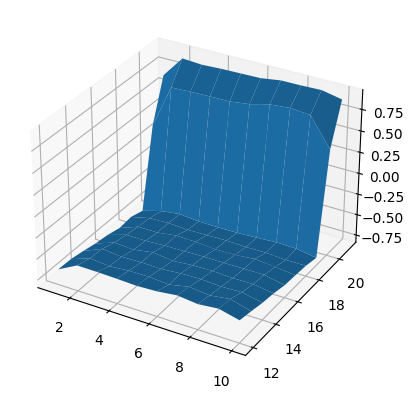

In [84]:
monte_carlo_blackjack(400000)

In [80]:
np.ravel_multi_index((4,9,0),(10,10,2),order='F')

98